In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the data

df = pd.read_csv('bottle.csv', low_memory=False)
df_binary = df[['Salnty', 'T_degC']]
df_binary.columns = ['Sal', 'Temp']

In [ ]:
# Display the first 5 rows
print(df_binary.head())

      Sal   Temp
0  33.440  10.50
1  33.440  10.46
2  33.437  10.46
3  33.420  10.45
4  33.421  10.45


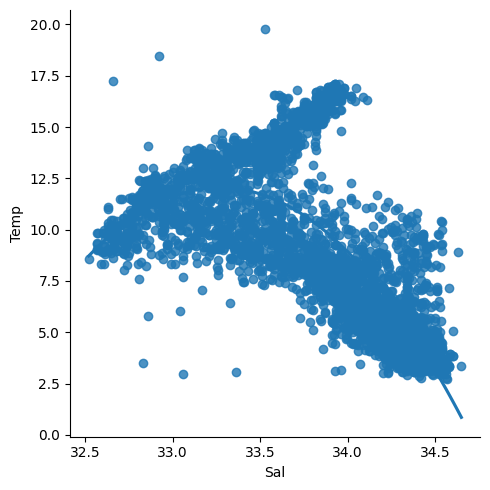

In [ ]:
# Plot the Scatter plot to check the relationship between Sal and Temp
sns.lmplot(x="Sal", y="Temp", data=df_binary, order=2, ci=None)
plt.show()

In [ ]:
# Eliminate NaN or missing input numbers
df_binary_copy = df_binary.copy()
df_binary_copy.fillna(method='pad', inplace=True)

In [ ]:
# Define the temperature threshold for 'hot' and 'cold' classes
threshold = 15

# Create a new column 'TempClass' to represent the classes 'cold' and 'hot'
df_binary_copy['TempClass'] = np.where(df_binary_copy['Temp'] < threshold, 'cold', 'hot')

In [ ]:
# Map 'cold' and 'hot' classes to numerical labels (0 and 1)
class_mapping = {'cold': 0, 'hot': 1}
df_binary_copy['TempClass'] = df_binary_copy['TempClass'].map(class_mapping)

In [ ]:
# Extract the feature and target data
X = df_binary_copy['Sal'].values.reshape(-1, 1)
y = df_binary_copy['TempClass'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the LogisticRegression model
regr = LogisticRegression()

# Fit the model on the training data
regr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regr.predict(X_test)

# Evaluate the model on the test data
print(regr.score(X_test, y_test))


0.9324452901998097


In [ ]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9324452901998097
Confusion Matrix:
[[980   0]
 [ 71   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       980
           1       0.00      0.00      0.00        71

    accuracy                           0.93      1051
   macro avg       0.47      0.50      0.48      1051
weighted avg       0.87      0.93      0.90      1051



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
